#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [15]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy numpy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/usr/local/bin:/Users/clotilde/Library/Python/3.12/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/opt/X11/bin:/Library/TeX/texbin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/opt/X11/bin:/Library/TeX/texbin


In [17]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [47]:
'''import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
url_2='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root'
download=wget.download(url)
download=wget.download(url_2)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
!mv B2HHH_MagnetUp.root ./LHCb_Data/B2HHH_MagnetUp.root
# If we ALL do this too often, CERN will block our IP address....  '''
#if you don't have the file already run this 
#just needed to download the files, to be run only once, 

In [19]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [20]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [21]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

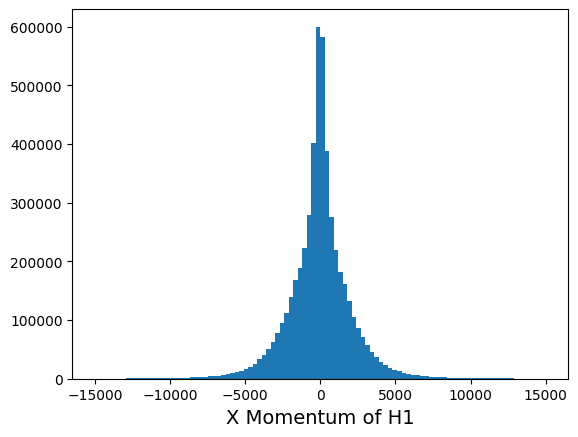

In [22]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

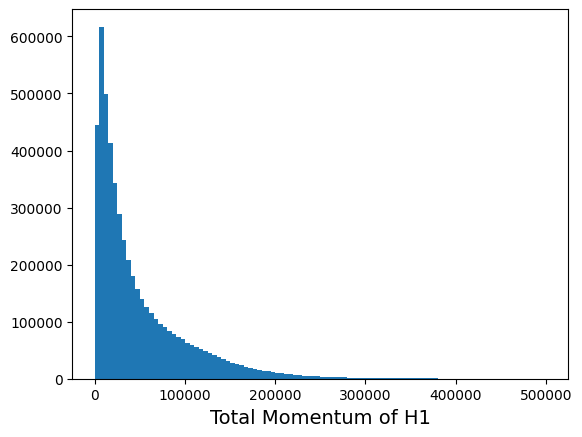

In [23]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()

# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot=np.sqrt(H1_PX**2+H1_PY**2+H1_PZ**2)

# then here you can plot something (remember to adjust the range)
plt.figure();
plt.hist (H1_Ptot, bins=100, range=(0,500000));
plt.xlabel('Total Momentum of H1', fontsize=14);


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

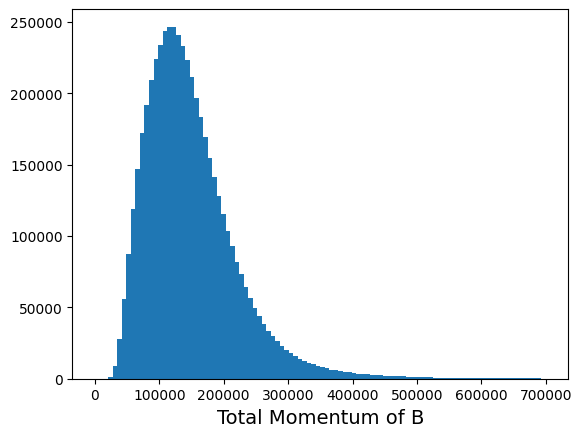

In [24]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...
#initiate variables 
H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()

H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()

#compute the momentum of each component of B
B_x=H1_PX+H2_PX+H3_PX
B_y=H1_PY+H2_PY+H3_PY
B_z=H1_PZ+H2_PZ+H3_PZ

#compute the total momentum of B
B_Ptot=np.sqrt(B_x**2+B_y**2+B_z**2)

#plot
plt.figure();
plt.hist (B_Ptot, bins=100, range=(0,700000));
plt.xlabel('Total Momentum of B', fontsize=14);


So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [25]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print ("%s  :  %s"% (branch, value))



Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

In [26]:
#do the maths here.
#define the energy formula
def energy (momentum, mass):
    E=np.sqrt(momentum**2+mass**2)
    return E
mass_kaons = 493.677 #(Particle Data Group, 2020)

#momentum od the daughters
H2_Ptot=np.sqrt(H2_PX**2+H2_PY**2+H2_PZ**2)
H3_Ptot=np.sqrt(H3_PX**2+H3_PY**2+H3_PZ**2)

#energies of the daughters 
E_H1=energy(H1_Ptot, mass_kaons)
E_H2=energy(H2_Ptot, mass_kaons)
E_H3=energy(H3_Ptot, mass_kaons)


reference: 

Particle Data Group. (2020). Review of Particle Physics: Charged Kaons. Retrieved from https://pdg.lbl.gov/2020/listings/rpp2020-list-K-plus-minus.pdf

We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

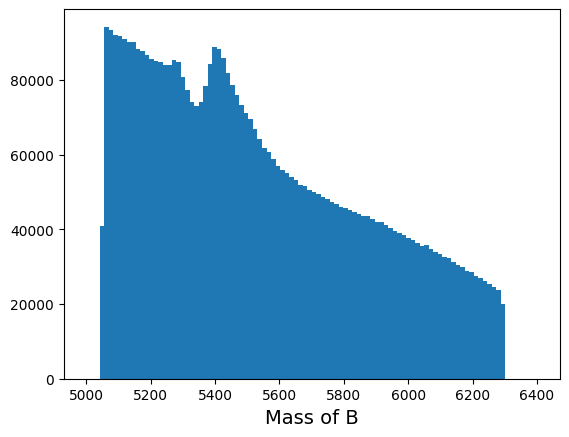

In [27]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters
def mass (energy, momentum):
    m=np.sqrt(energy**2-momentum**2)
    return m
#total energy 
E_B=E_H1+E_H2+E_H3
#mass of B
mass_B=mass(E_B, B_Ptot)

#Now plot a histogram of the range of masses of the B meson.
plt.figure();
plt.hist (mass_B, bins=100, range=(5000,6400));
plt.xlabel('Mass of B', fontsize=14);
#Hint - look it up

Does this match what we would expect from theory? 
From theory B mesons have a mass of 5.279 GeV. (Oxford University Press, n.d.)
The graph show to spike close to the theoretical value (with one pretty spot on). However it could be more accurate as it also shows a lot of bosons with lighter masses. This could be explain as no filtering was done to select the kaons. This suggest that some masses are actually not representatif of the boson mass.

references:
Oxford University Press. (n.d.). B meson. In Oxford Reference. Retrieved February 24, 2025, from https://www.oxfordreference.com/display/10.1093/oi/authority.20110803095514188

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

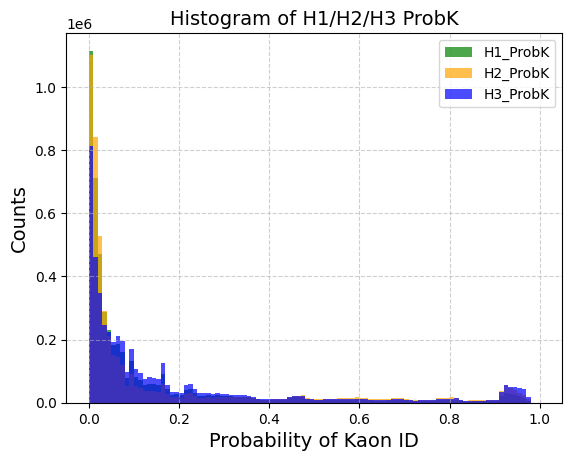

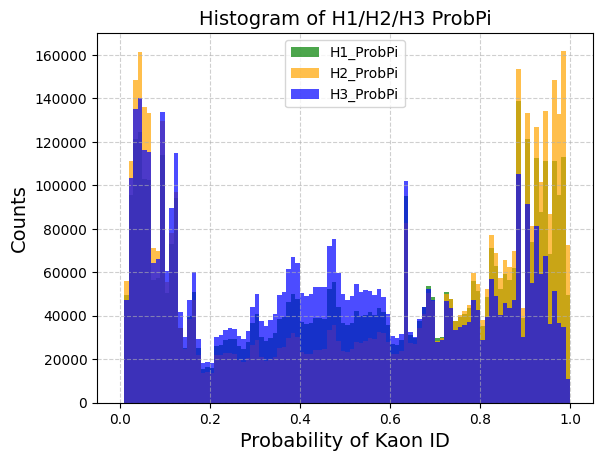

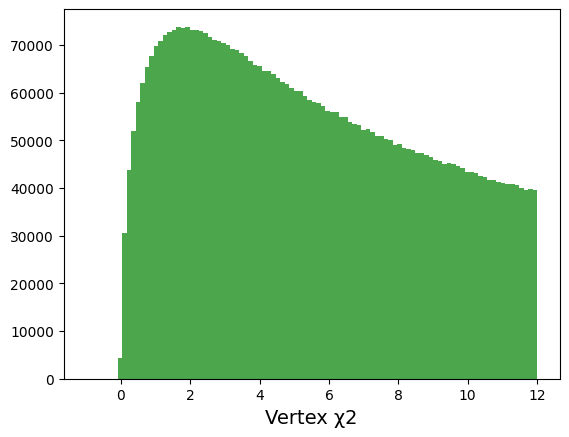

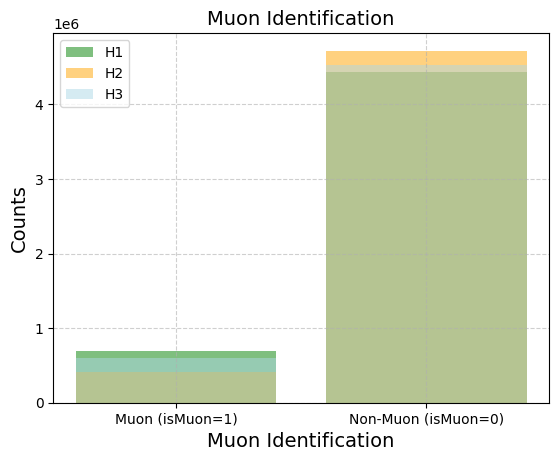

In [28]:
#Make plots of H1/H2/H3 _ProbK on one plot
plt.figure() 

# Plot histograms for H1, H2, and H3 on the same plot
plt.hist(branches['H1_ProbK'], bins=100, range=(0,1), color='green', alpha=0.7, label='H1_ProbK')
plt.hist(branches['H2_ProbK'], bins=100, range=(0,1), color='orange', alpha=0.7, label='H2_ProbK')
plt.hist(branches['H3_ProbK'], bins=100, range=(0,1), color='blue', alpha=0.7, label='H3_ProbK')

# Labels and Title
plt.xlabel('Probability of Kaon ID', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Histogram of H1/H2/H3 ProbK', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)


#Make plots of H1/H2/H3 _ProbPi on one plot
plt.figure() 

# Plot histograms for H1, H2, and H3 on the same plot
plt.hist(branches['H1_ProbPi'], bins=100, range=(0,1), color='green', alpha=0.7, label='H1_ProbPi')
plt.hist(branches['H2_ProbPi'], bins=100, range=(0,1), color='orange', alpha=0.7, label='H2_ProbPi')
plt.hist(branches['H3_ProbPi'], bins=100, range=(0,1), color='blue', alpha=0.7, label='H3_ProbPi')

# Labels and Title
plt.xlabel('Probability of Kaon ID', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Histogram of H1/H2/H3 ProbPi', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

#For all our particles, make a plot of the B_VertexChi2
plt.figure() 
plt.hist(branches['B_VertexChi2'], bins=100, range=(-1,12), color='green', alpha=0.7, label='H1_ProbK')
plt.xlabel('Vertex χ2', fontsize=14);


# Plot any other variables from the list above you think would be handy to use in a selection...

#Initiate muon counter 
count_of_muon_h1=0
count_of_non_muon_h1=0
count_of_muon_h2=0
count_of_non_muon_h2=0
count_of_muon_h3=0
count_of_non_muon_h3=0

#counter of muon and non muon 
for is_muon in branches['H1_isMuon']:
    if is_muon == 1:
        count_of_muon_h1 += 1
    else:
        count_of_non_muon_h1 += 1
        
for is_muon in branches['H2_isMuon']:
    if is_muon == 1:
        count_of_muon_h2 += 1
    else:
        count_of_non_muon_h2 += 1
        
for is_muon in branches['H3_isMuon']:
    if is_muon == 1:
        count_of_muon_h3 += 1
    else:
        count_of_non_muon_h3 += 1

#define list to make plotting easier         
muon_counts_h1 = [count_of_muon_h1, count_of_non_muon_h1]
muon_counts_h2 = [count_of_muon_h2, count_of_non_muon_h2]
muon_counts_h3 = [count_of_muon_h3, count_of_non_muon_h3]

# Bar plot for the muon identification
plt.figure()
labels = ['Muon (isMuon=1)', 'Non-Muon (isMuon=0)']
plt.bar(labels, muon_counts_h1, color=['green', 'green'], alpha=0.5, label='H1')
plt.bar(labels, muon_counts_h2, color=['orange', 'orange'], alpha=0.5, label='H2')
plt.bar(labels, muon_counts_h3, color=['lightblue', 'lightblue'], alpha=0.5, label='H3')
# Labels and Title
plt.xlabel('Muon Identification', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Muon Identification', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

Using these plots, we can now think about making a preselection. This has some format like the below:

In [29]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)
'''election=(branches['H1_ProbPi']>0.9) && (branches['H2_ProbPi']>0.9) && (branches['H3_ProbPi']>0.9) && 
(branches['H1_isMuon']!==1 && (branches['H2_isElectron'] == 1 && (branches['H3_isElephant']==1)'''

#selection 
selection = (
    (branches['H1_ProbK'] > branches['H1_ProbPi']) &
    (branches['H2_ProbK'] > branches['H2_ProbPi']) &
    (branches['H3_ProbK'] > branches['H3_ProbPi']) &  #accept when the probability of it to be a kaons is bigger than the probability to be a pion 
    (branches['H1_isMuon'] != 1) &
    (branches['H2_isMuon'] != 1) &
    (branches['H3_isMuon'] != 1) & # reject muons 
    (branches['B_FlightDistance'] < 20) & 
    (branches['B_VertexChi2'] < 20) #limit the flight distance and the vertex chi of the accepted particle
)

Total number of events: 5135823
Total number of selected events: 34417


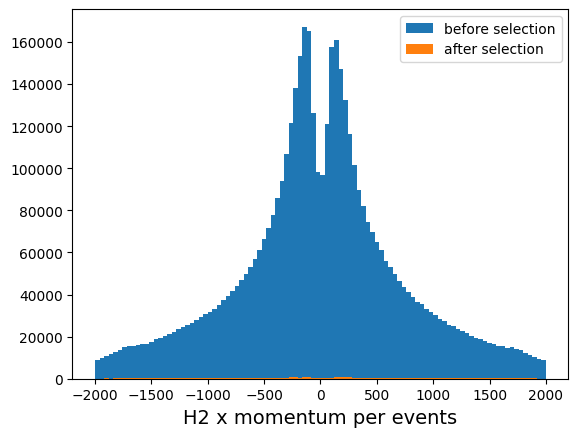

In [30]:
#To apply the selection - we can use the selection command after our instruction e.g.:
'''CutTree=branches['H2_PX'][selection]'''
#probably we can make this more generic - try below if you like...
CutTree = branches[selection]

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree
total_selected_events = len(CutTree)

total_events = len(branches_dictionary)
print(f'Total number of events: {total_events}')
print(f'Total number of selected events: {total_selected_events}')

#Try plotting our H2_PX distribution with and without the selection and spot the differences...
plt.figure();
plt.hist (branches['H2_PX'], bins=100, range=(-2000,2000), label='before selection');
plt.hist (CutTree['H2_PX'], bins=100, range=(-2000,2000), label='after selection');
plt.xlabel('H2 x momentum per events', fontsize=14);
plt.legend()


We can clearly see a huge different amount of event, after the selection we go from 5135823 to 34417 events. Less events can seem bad but this ensure we are working with the relevant particle (kaons, Boson's dauters) instead of other particle. 

Total number of events: 5135823
Total number of selected events: 34417


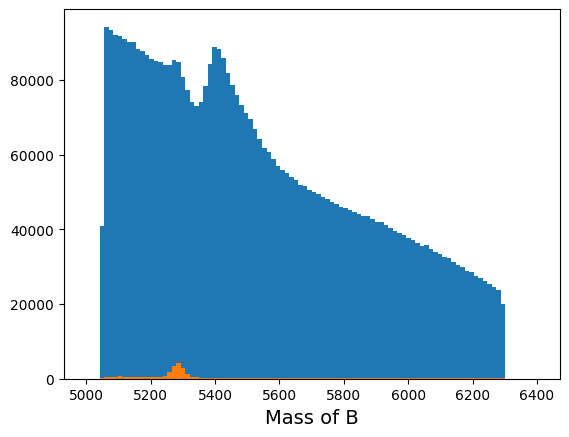

In [31]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)

#computation of the momentum component of B
B_x_cut=CutTree['H1_PX']+CutTree['H2_PX']+CutTree['H3_PX']
B_y_cut=CutTree['H1_PY']+CutTree['H2_PY']+CutTree['H3_PY']
B_z_cut=CutTree['H1_PZ']+CutTree['H2_PZ']+CutTree['H3_PZ']

#computation of the total momentum of B
B_momentum_cut=np.sqrt(B_x_cut**2+B_y_cut**2+B_z_cut**2)

#computation of the total momentum of each kaons 
H1_Ptot_cut=np.sqrt(CutTree['H1_PX']**2+CutTree['H1_PY']**2+CutTree['H1_PZ']**2)
H2_Ptot_cut=np.sqrt(CutTree['H2_PX']**2+CutTree['H2_PY']**2+CutTree['H2_PZ']**2)
H3_Ptot_cut=np.sqrt(CutTree['H3_PX']**2+CutTree['H3_PY']**2+CutTree['H3_PZ']**2)

#computation of the total energy of each kaons 
H1_E_cut=energy(H1_Ptot_cut, mass_kaons)
H2_E_cut=energy(H2_Ptot_cut, mass_kaons)
H3_E_cut=energy(H3_Ptot_cut, mass_kaons)

#computation of the total energy of B
B_energy_cut= H1_E_cut+H2_E_cut+H3_E_cut

#computation of the mass of B, using the total energy and momentum of B
B_mass_cut=mass(B_energy_cut, B_momentum_cut)

plt.figure();
plt.hist (mass_B, bins=100, range=(5000,6400));
plt.hist (B_mass_cut, bins=100, range=(5000,6400));
plt.xlabel('Mass of B', fontsize=14);


#You can also use len() to find the number of entries in each.
total_events = len(branches_dictionary)
print(f'Total number of events: {total_events}')
print(f'Total number of selected events: {total_selected_events}')



What do you notice about your histogram now?
The histogram now shows a clear spike at the expected B mass. Many events were removed, making this peak stand out. This confirms that filtering the data helps focus on relevant events.

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

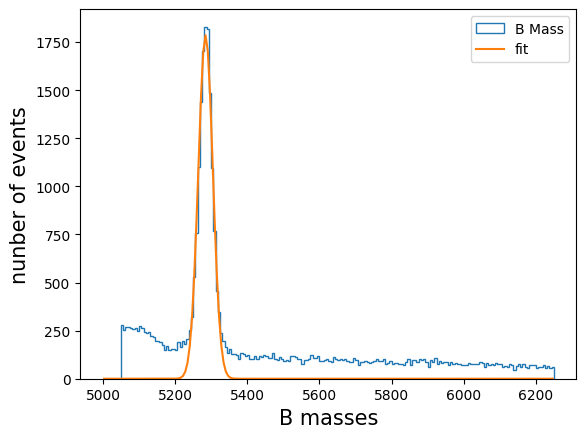

In [50]:
# Grab another package
from scipy.optimize import curve_fit

# Start by defining the variable we are interested in...
B_Mass = B_mass_cut

# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
bin_height, bin_edge, _=plt.hist(B_Mass, bins=200, range=(5000, 6250), label = "B Mass", histtype=u'step')

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

#Create a Gauss function for fitting - nothing needs changing here
def gauss (x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
p0 = [max(y_data), np.mean(B_Mass), np.std(B_Mass)]

# Get the fitted curve - some things need changing here
optimisedParameters_gauss, pcov_gauss = curve_fit(gauss, x_data, y_data, p0=p0);
#note you need to pick some initial parameters in p0= above!

y_fit_gauss = gauss(x_data, *optimisedParameters_gauss)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well
plt.plot(x_data, y_fit_gauss, label='fit');
plt.xlabel("B masses", fontsize=15)
plt.ylabel("nunber of events", fontsize=15)

plt.legend()
plt.legend()
plt.show()


The first guess of a gaussian distribution capture pretty well the spike but not the rest of the data.
Combining fitting function could improve the fitting.

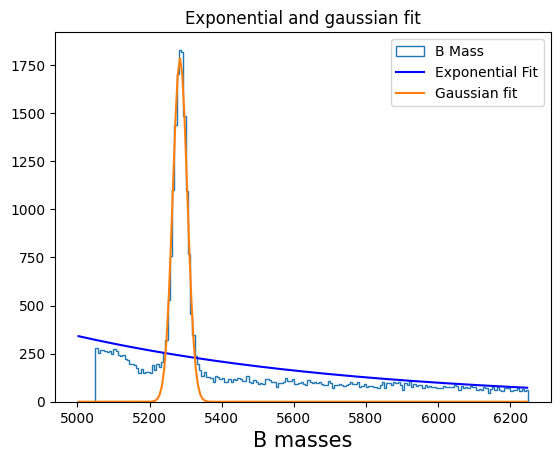

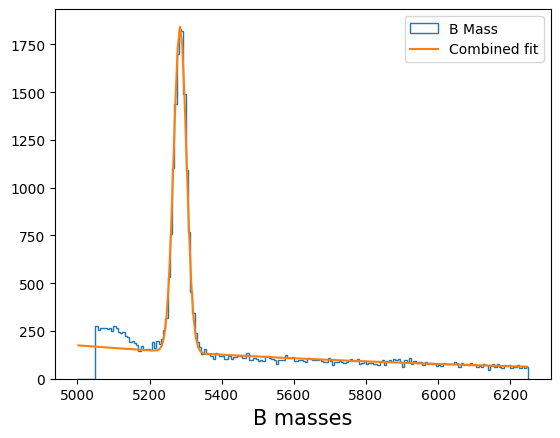

In [52]:
# Explore optimisedParameters - what does it contain?
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential.

#defining exponential and the combined function 
def exp_background(x, B, lambda_):
    return B * np.exp(-lambda_ * x)

def gauss_plus_exp(x, A, mu, sigma, B, lambda_):
    return gauss(x, A, mu, sigma) + exp_background(x, B, lambda_)

#ploting the gaussian and the exponential fit separately
#Defining variables:
bin_height, bin_edge, _=plt.hist(B_Mass, bins=200, range=(5000, 6250), label = "B Mass", histtype=u'step')

x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

A_initial= max(y_data)
mu_initial= np.mean(B_Mass)
sigma_initial= 313.5 #Chosen to match std(B_mass) and avoid negative sigma later on.
B_initial= max(y_data)
lamnda_= 0.0000005

#apply the exponential curve fit to the data 
optimisedParameters_exp, pcov_exp = curve_fit(exp_background, x_data, y_data, p0=[B_initial, lamnda_]);
y_fit_exp = exp_background(x_data, *optimisedParameters_exp)

#ploting the gaussian and the exponential fit separately
plt.plot(x_data, y_fit_exp, label='Exponential Fit', color='blue')
plt.plot(x_data, y_fit_gauss, label='Gaussian fit');
plt.xlabel("B masses", fontsize=15)
plt.title("Exponential and gaussian fit")
plt.legend()
plt.show()

#ploting the gaussian and the exponential fit combined 
#Defining variables:
bin_height, bin_edge, _=plt.hist(B_Mass, bins=200, range=(5000, 6250), label = "B Mass", histtype=u'step')

x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

##apply the combined curve fit to the data
optimisedParameters_gauss_exp, pcov_gauss_exp = curve_fit(gauss_plus_exp, x_data, y_data, p0=[A_initial, mu_initial, sigma_initial, B_initial, lamnda_]);
y_fit_gauss_exp = gauss_plus_exp(x_data, *optimisedParameters_gauss_exp)

plt.plot(x_data, y_fit_gauss_exp, label='Combined fit');
plt.xlabel("B masses", fontsize=15)
plt.legend()
plt.show() 

Explore optimisedParameters - what does it contain?
It contains the best-fit values for the model's parameters (amplitude of the gaussian, mean, standard deviation, amplitude of the exponential and the decay constant)

We can clearly see the combination od the gaussian and the exponential is the best fit. To make sure of this the following code will asses the acuracy of the fitting.

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?
Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [34]:
#defining the formula for the yield 
def signal_yield_(A, sigma, mass_max, mass_min, n_bins):
    signal_yield = (A * sigma * np.sqrt(2 * np.pi) / (mass_max - mass_min)) * n_bins
    return signal_yield

#defining the formula for the uncertainties of the yield 
def delta_yield(delta_A, A, delta_sigma, sigma, signal_yield):
    delta_yield = np.sqrt((delta_A / A) ** 2 + (delta_sigma / sigma) ** 2) * signal_yield
    return delta_yield

#defining the formula to compute the chi-squared value
def chi_squared_reduced(y_data, y_fit, optimisedParameters):
    epsilon = 1e-6 #avoid division by zero
    chi_squared = np.sum(((y_data - y_fit) ** 2) / (y_fit+epsilon)) 
    dof = len(y_data) - len(optimisedParameters)  
    chi_squared_reduced = chi_squared / dof
    return chi_squared_reduced


#-----------------------For the combined fit----------------------:
#initiate the variables 
A, mu, sigma, B, lambda_= optimisedParameters_gauss_exp
mass_min, mass_max = 5000, 6250
n_bins = 200

covariances = np.diag(pcov_gauss_exp)
delta_A = np.sqrt(covariances[0])  # Uncertainty in A
delta_sigma = np.sqrt(covariances[2])  # Uncertainty in sigma

#this is needed for the background yield
total_events = np.sum(y_data)
delta_total_events = np.sqrt(total_events) 

#computation of the yield for the compined fit
signal_yield_value = signal_yield_(A, sigma, mass_max, mass_min, n_bins)
delta_signal_yield_value = delta_yield(delta_A, A, delta_sigma, sigma, signal_yield_value)

#computation of the background yield for the compined fit
background_yield = total_events - signal_yield_value
delta_background_yield_value = np.sqrt(delta_total_events**2 + delta_signal_yield_value**2)

#Computation of the chi_squared value for each fit 
chi_squared_gauss_exp=chi_squared_reduced(y_data, y_fit_gauss_exp, optimisedParameters_gauss_exp)#combined fit
chi_squared_gauss=chi_squared_reduced(y_data, y_fit_gauss, optimisedParameters_gauss)#gaussian fit
chi_squared_exp=chi_squared_reduced(y_data, y_fit_exp, optimisedParameters_exp)#exponential fit 


print(f"Signal Yield: {signal_yield_value:.2f} ± {delta_signal_yield_value:.2f}")
print(f"Background Yield: {background_yield:.2f} ± {delta_background_yield_value:.2f}")
print(f"Reduced Chi-Squared for combined fit: {chi_squared_gauss_exp:.2f}")
print(f"Reduced Chi-Squared for gaussian fit: {chi_squared_gauss:.2f}")
print(f"Reduced Chi-Squared for exponential fit: {chi_squared_exp:.2f}")


Signal Yield: 12118.55 ± 277.46
Background Yield: 21862.45 ± 333.11
Reduced Chi-Squared for combined fit: 12.70
Reduced Chi-Squared for gaussian fit: 10549040963.73
Reduced Chi-Squared for exponential fit: 287.59


The combined fit works much better than the Gaussian or Exponential alone, but the reduced chi-squared is still quite high (12.70). This suggests the model doesn't fully describe the data. The Gaussian fit is completely off, and the Exponential alone also doesn’t work well. The high chi-squared might be due to underestimated uncertainties, missing components in the model. Further adjustement are needed to refine the model or checking the data selection could help.

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

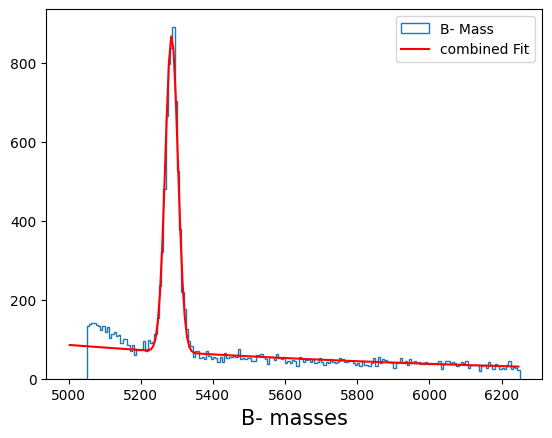

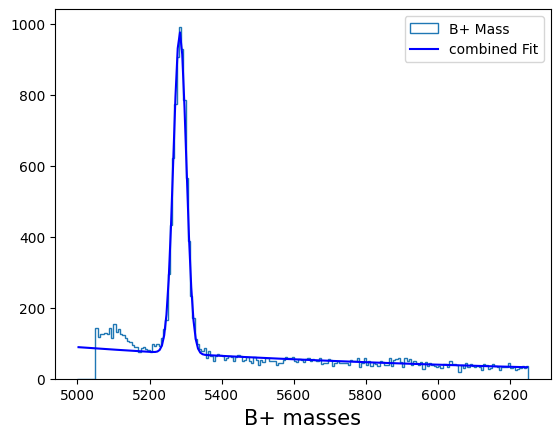

Yield of B-: 5611.459
Yield of B+: 6507.666
Assymetry: -0.074 +/- 0.009
Significance: 8.16σ
Strong evidence (possible discovery).


In [55]:

#---------------Selection of B+ and B- on the preselected data--------------------------
selection_b_minus = (
    ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == -1)) |
    ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == -1)) |
    ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == 1))
) #Keep when the event has 2 negative charges with one positive charge 

selection_b_plus = (
    ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == -1)) |
    ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == 1)) |
    ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == 1))
) #Keep when the event has 2 positive charges with negative charge 

#applying the selection
Tree_b_minus = CutTree[selection_b_minus]
Tree_b_plus = CutTree[selection_b_plus]

#--------Computation of the mass of B+ and B- using the Kaons daughter's momentum and energy---------

#computation of the momentum component of B-
B_x_minus=Tree_b_minus['H1_PX']+Tree_b_minus['H2_PX']+Tree_b_minus['H3_PX']
B_y_minus=Tree_b_minus['H1_PY']+Tree_b_minus['H2_PY']+Tree_b_minus['H3_PY']
B_z_minus=Tree_b_minus['H1_PZ']+Tree_b_minus['H2_PZ']+Tree_b_minus['H3_PZ']

B_momentum_minus=np.sqrt(B_x_minus**2+B_y_minus**2+B_z_minus**2) #total B- momentum

#computation of the momentum component of B+
B_x_plus=Tree_b_plus['H1_PX']+Tree_b_plus['H2_PX']+Tree_b_plus['H3_PX']
B_y_plus=Tree_b_plus['H1_PY']+Tree_b_plus['H2_PY']+Tree_b_plus['H3_PY']
B_z_plus=Tree_b_plus['H1_PZ']+Tree_b_plus['H2_PZ']+Tree_b_plus['H3_PZ']

B_momentum_plus=np.sqrt(B_x_plus**2+B_y_plus**2+B_z_plus**2) #total B+ momentum

#total momentum of each B- daughter's (kaons)
H1_Ptot_B_minus=np.sqrt(Tree_b_minus['H1_PX']**2+Tree_b_minus['H1_PY']**2+Tree_b_minus['H1_PZ']**2)
H2_Ptot_B_minus=np.sqrt(Tree_b_minus['H2_PX']**2+Tree_b_minus['H2_PY']**2+Tree_b_minus['H2_PZ']**2)
H3_Ptot_B_minus=np.sqrt(Tree_b_minus['H3_PX']**2+Tree_b_minus['H3_PY']**2+Tree_b_minus['H3_PZ']**2)

#total momentum of each B+ daughter's (kaons)
H1_Ptot_B_plus=np.sqrt(Tree_b_plus['H1_PX']**2+Tree_b_plus['H1_PY']**2+Tree_b_plus['H1_PZ']**2)
H2_Ptot_B_plus=np.sqrt(Tree_b_plus['H2_PX']**2+Tree_b_plus['H2_PY']**2+Tree_b_plus['H2_PZ']**2)
H3_Ptot_B_plus=np.sqrt(Tree_b_plus['H3_PX']**2+Tree_b_plus['H3_PY']**2+Tree_b_plus['H3_PZ']**2)

#total energy of each B- daughter's (kaons)
H1_E_B_minus=energy(H1_Ptot_B_minus, mass_kaons)
H2_E_B_minus=energy(H2_Ptot_B_minus, mass_kaons)
H3_E_B_minus=energy(H3_Ptot_B_minus, mass_kaons)

#total energy of each B+ daughter's (kaons)
H1_E_B_plus=energy(H1_Ptot_B_plus, mass_kaons)
H2_E_B_plus=energy(H2_Ptot_B_plus, mass_kaons)
H3_E_B_plus=energy(H3_Ptot_B_plus, mass_kaons)

#energy total of B- (sum of the daughter's energy)
B_energy_minus= H1_E_B_minus+H2_E_B_minus+H3_E_B_minus

#energy total of B+ (sum of the daughter's energy)
B_energy_plus= H1_E_B_plus+H2_E_B_plus+H3_E_B_plus

#mass total of B- using momentum and energy 
B_mass_minus=mass(B_energy_minus, B_momentum_minus)

#mass total of B+ using momentum and energy 
B_mass_plus=mass(B_energy_plus, B_momentum_plus)


#----------------------------plotting of the B- masses and their fit-----------------------------
bin_height_B_minus, bin_edge_B_minus, _=plt.hist(B_mass_minus, bins=200, range=(5000, 6250), label = "B- Mass", histtype=u'step')

#initiating the variables 
x_data_B_minus = (bin_edge_B_minus[:-1] + bin_edge_B_minus[1:]) / 2
y_data_B_minus = bin_height_B_minus

A_initial_B_minus= max(y_data_B_minus)
mu_initial_B_minus= np.mean(B_mass_minus)
sigma_initial_B_minus= 313.5 #Chosen to match std(B_mass_minus) and avoid negative sigma later on.
B_initial_B_minus= max(y_data_B_minus)
lamnda_= 0.0000005

#applying the fitting to the data (B-)
optimisedParameters_gauss_exp_B_minus, pcov_gauss_exp_B_minus = curve_fit(gauss_plus_exp, x_data_B_minus, y_data_B_minus, p0=[A_initial_B_minus, mu_initial_B_minus, sigma_initial_B_minus, B_initial_B_minus, lamnda_])
y_fit_B_minus = gauss_plus_exp(x_data_B_minus, *optimisedParameters_gauss_exp_B_minus)

plt.plot(x_data_B_minus, y_fit_B_minus, label='combined Fit', color='red')
plt.xlabel("B- masses", fontsize=15)
plt.legend()
plt.show()

#----------------------------plotting of the B+ masses and their fit------------------------------- 
bin_height_B_plus, bin_edge_B_plus, _=plt.hist(B_mass_plus, bins=200, range=(5000, 6250), label = "B+ Mass", histtype=u'step')

#initiating the variables 
x_data_B_plus = (bin_edge_B_plus[:-1] + bin_edge_B_plus[1:]) / 2
y_data_B_plus = bin_height_B_plus

A_initial_B_plus= max(y_data_B_plus)
mu_initial_B_plus= np.mean(B_mass_plus)
sigma_initial_B_plus=np.std(B_mass_plus)
B_initial_B_plus= max(y_data_B_plus)
lamnda_= 0.0000005

#applying the fitting to the data (B+)
optimisedParameters_gauss_exp_B_plus, pcov_gauss_exp_B_plus = curve_fit(gauss_plus_exp, x_data_B_plus, y_data_B_plus, p0=[A_initial_B_plus, mu_initial_B_plus, sigma_initial_B_plus, B_initial_B_plus, lamnda_])
y_fit_B_plus = gauss_plus_exp(x_data_B_plus, *optimisedParameters_gauss_exp_B_plus)

plt.plot(x_data_B_plus, y_fit_B_plus, label='combined Fit', color='blue')
plt.xlabel("B+ masses", fontsize=15)
plt.legend()
plt.show()

#---------------------computation of the yield and it's uncertainty for B- -------------------------
#initiate variables 
covariances = np.diag(pcov_gauss_exp_B_minus)
delta_A_B_minus= np.sqrt(covariances[0])  
delta_sigma_B_minus= np.sqrt(covariances[2])  
A_B_minus, mu, sigma_B_minus, B, lambda_=optimisedParameters_gauss_exp_B_minus

#computation using the predefind function 
signal_yield_B_minus= signal_yield_(A_B_minus, sigma_B_minus, mass_max, mass_min, n_bins)
delta_signal_yield_B_minus = delta_yield(delta_A_B_minus, A_B_minus, delta_sigma_B_minus, sigma_B_minus, signal_yield_B_minus)

#----------------------computation of the yield and it's uncertainty for B+--------------------------
#initiate variables 
covariances = np.diag(pcov_gauss_exp_B_plus)
delta_A_B_plus= np.sqrt(covariances[0])  
delta_sigma_B_plus= np.sqrt(covariances[2])  
A_B_plus, mu, sigma_B_plus, B, lambda_=optimisedParameters_gauss_exp_B_plus

#computation using the predefind function 
signal_yield_B_plus= signal_yield_(A_B_plus, sigma_B_plus, mass_max, mass_min, n_bins)
delta_signal_yield_B_plus = delta_yield(delta_A_B_plus, A_B_plus, delta_sigma_B_plus, sigma_B_plus, signal_yield_B_plus)

#-----------------------------Computation of the assymetry and it's uncertainty----------------------
A_final = (signal_yield_B_minus - signal_yield_B_plus) / (signal_yield_B_minus+ signal_yield_B_plus)
sigma_A = np.sqrt((1-A_final**2) / (signal_yield_B_minus + signal_yield_B_plus))


print(f"Yield of B-: {signal_yield_B_minus:.3f}")
print(f"Yield of B+: {signal_yield_B_plus:.3f}")
print(f"Assymetry: {A_final:.3f} +/- {sigma_A:.3f}")

#--------------------------Check the significance of the assymetry by applying a  Z-test--------------------
def check_significance(asymmetry, uncertainty):
    
    if uncertainty == 0:
        return float('inf'), "Uncertainty cannot be zero."
    
    significance = abs(asymmetry) / abs(uncertainty)
    
    if abs(significance) > 5:
        interpretation = "Strong evidence (possible discovery)."
    elif abs(significance) > 3:
        interpretation = "Moderate evidence."
    else:
        interpretation = "Not statistically significant."
    
    return significance, interpretation


significance, message = check_significance(A_final, sigma_A)
print(f"Significance: {significance:.2f}σ")
print(message)


The result shows a Yield of B- = 5611.459 and a Yield of B+ = 6507.666. The asymmetry between the two yields is -0.074 ± 0.009, with a significance of 8.16σ. The negative asymmetry value indicates more matter are produced than anti matter (This supports the hypothesis that an excess of matter over antimatter was needed at the creation of the universe.) The significance of 8.16σ is very high, indicating strong evidence for the observed asymmetry.


# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

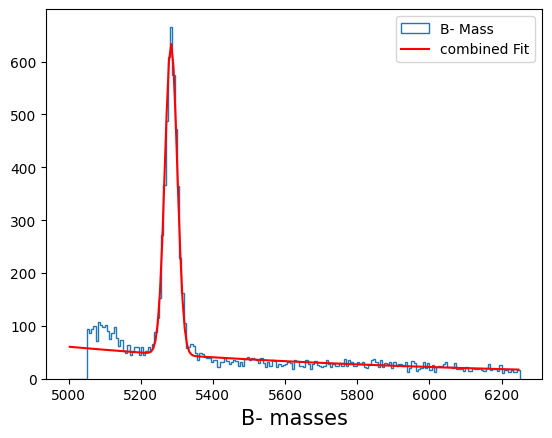

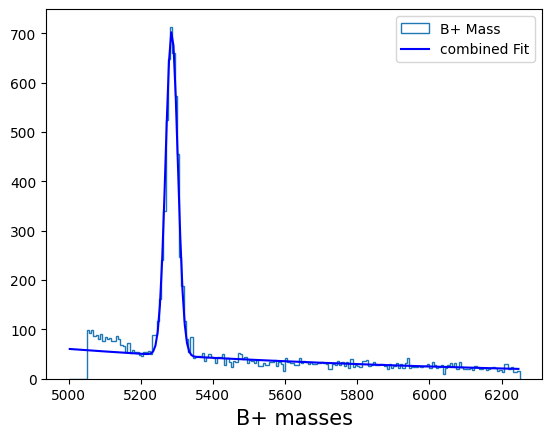

Yield of B-: 4043.007
Yield of B+: 4431.008
Assymetry: -0.046 +/- 0.011
Significance: 4.22σ
Moderate evidence.


In [56]:
file_path = "LHCb_Data/B2HHH_MagnetUp.root"
f = uproot.open(file_path)  # Use the correct file path
f.keys()

f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

Events=f['DecayTree']

branches_2=Events.arrays()
branches_dictionary=branches_2.tolist()

#selection 
selection_2 = (
    (branches_2['H1_ProbK'] > branches_2['H1_ProbPi']) &
    (branches_2['H2_ProbK'] > branches_2['H2_ProbPi']) &
    (branches_2['H3_ProbK'] > branches_2['H3_ProbPi']) &  #accept when the probability of it to be a kaons is bigger than the probability to be a pion 
    (branches_2['H1_isMuon'] != 1) &
    (branches_2['H2_isMuon'] != 1) &
    (branches_2['H3_isMuon'] != 1) & # reject muons 
    (branches_2['B_FlightDistance'] < 20) & 
    (branches_2['B_VertexChi2'] < 20) #limit the flight distance and the vertex chi of the accepted particle
)

CutTree_2 = branches_2[selection_2]
total_selected_events_2 = len(CutTree_2)

#---------------Selection of B+ and B- on the preselected data--------------------------
selection_b_minus_2 = (
    ((CutTree_2['H1_Charge'] == 1) & (CutTree_2['H2_Charge'] == -1) & (CutTree_2['H3_Charge'] == -1)) |
    ((CutTree_2['H1_Charge'] == -1) & (CutTree_2['H2_Charge'] == 1) & (CutTree_2['H3_Charge'] == -1)) |
    ((CutTree_2['H1_Charge'] == -1) & (CutTree_2['H2_Charge'] == -1) & (CutTree_2['H3_Charge'] == 1))
) #Keep when the event has 2 negative charges with one positive charge 

selection_b_plus_2 = (
    ((CutTree_2['H1_Charge'] == 1) & (CutTree_2['H2_Charge'] == 1) & (CutTree_2['H3_Charge'] == -1)) |
    ((CutTree_2['H1_Charge'] == -1) & (CutTree_2['H2_Charge'] == 1) & (CutTree_2['H3_Charge'] == 1)) |
    ((CutTree_2['H1_Charge'] == 1) & (CutTree_2['H2_Charge'] == -1) & (CutTree_2['H3_Charge'] == 1))
) #Keep when the event has 2 positive charges with negative charge 

#applying the selection
Tree_b_minus_2 = CutTree_2[selection_b_minus_2]
Tree_b_plus_2 = CutTree_2[selection_b_plus_2]

#--------Computation of the mass of B+ and B- using the Kaons daughter's momentum and energy---------

#computation of the momentum component of B-
B_x_minus_2=Tree_b_minus_2['H1_PX']+Tree_b_minus_2['H2_PX']+Tree_b_minus_2['H3_PX']
B_y_minus_2=Tree_b_minus_2['H1_PY']+Tree_b_minus_2['H2_PY']+Tree_b_minus_2['H3_PY']
B_z_minus_2=Tree_b_minus_2['H1_PZ']+Tree_b_minus_2['H2_PZ']+Tree_b_minus_2['H3_PZ']

B_momentum_minus_2=np.sqrt(B_x_minus_2**2+B_y_minus_2**2+B_z_minus_2**2) #total B- momentum

#computation of the momentum component of B+
B_x_plus_2=Tree_b_plus_2['H1_PX']+Tree_b_plus_2['H2_PX']+Tree_b_plus_2['H3_PX']
B_y_plus_2=Tree_b_plus_2['H1_PY']+Tree_b_plus_2['H2_PY']+Tree_b_plus_2['H3_PY']
B_z_plus_2=Tree_b_plus_2['H1_PZ']+Tree_b_plus_2['H2_PZ']+Tree_b_plus_2['H3_PZ']

B_momentum_plus_2=np.sqrt(B_x_plus_2**2+B_y_plus_2**2+B_z_plus_2**2) #total B+ momentum

#total momentum of each B- daughter's (kaons)
H1_Ptot_B_minus_2=np.sqrt(Tree_b_minus_2['H1_PX']**2+Tree_b_minus_2['H1_PY']**2+Tree_b_minus_2['H1_PZ']**2)
H2_Ptot_B_minus_2=np.sqrt(Tree_b_minus_2['H2_PX']**2+Tree_b_minus_2['H2_PY']**2+Tree_b_minus_2['H2_PZ']**2)
H3_Ptot_B_minus_2=np.sqrt(Tree_b_minus_2['H3_PX']**2+Tree_b_minus_2['H3_PY']**2+Tree_b_minus_2['H3_PZ']**2)

#total momentum of each B+ daughter's (kaons)
H1_Ptot_B_plus_2=np.sqrt(Tree_b_plus_2['H1_PX']**2+Tree_b_plus_2['H1_PY']**2+Tree_b_plus_2['H1_PZ']**2)
H2_Ptot_B_plus_2=np.sqrt(Tree_b_plus_2['H2_PX']**2+Tree_b_plus_2['H2_PY']**2+Tree_b_plus_2['H2_PZ']**2)
H3_Ptot_B_plus_2=np.sqrt(Tree_b_plus_2['H3_PX']**2+Tree_b_plus_2['H3_PY']**2+Tree_b_plus_2['H3_PZ']**2)

#total energy of each B- daughter's (kaons)
H1_E_B_minus_2=energy(H1_Ptot_B_minus_2, mass_kaons)
H2_E_B_minus_2=energy(H2_Ptot_B_minus_2, mass_kaons)
H3_E_B_minus_2=energy(H3_Ptot_B_minus_2, mass_kaons)

#total energy of each B+ daughter's (kaons)
H1_E_B_plus_2=energy(H1_Ptot_B_plus_2, mass_kaons)
H2_E_B_plus_2=energy(H2_Ptot_B_plus_2, mass_kaons)
H3_E_B_plus_2=energy(H3_Ptot_B_plus_2, mass_kaons)

#energy total of B- (sum of the daughter's energy)
B_energy_minus_2= H1_E_B_minus_2+H2_E_B_minus_2+H3_E_B_minus_2

#energy total of B+ (sum of the daughter's energy)
B_energy_plus_2= H1_E_B_plus_2+H2_E_B_plus_2+H3_E_B_plus_2

#mass total of B- using momentum and energy 
B_mass_minus_2=mass(B_energy_minus_2, B_momentum_minus_2)

#mass total of B+ using momentum and energy 
B_mass_plus_2=mass(B_energy_plus_2, B_momentum_plus_2)


#----------------------------plotting of the B- masses and their fit-----------------------------
bin_height_B_minus_2, bin_edge_B_minus_2, _=plt.hist(B_mass_minus_2, bins=200, range=(5000, 6250), label = "B- Mass", histtype=u'step')

#initiating the variables 
x_data_B_minus_2 = (bin_edge_B_minus_2[:-1] + bin_edge_B_minus_2[1:]) / 2
y_data_B_minus_2 = bin_height_B_minus_2

A_initial_B_minus_2= max(y_data_B_minus_2)
mu_initial_B_minus_2= np.mean(B_mass_minus_2)
sigma_initial_B_minus_2= 303.4 #Chosen to match std(B_mass_minus) and avoid negative sigma later on.
B_initial_B_minus_2= max(y_data_B_minus_2)
lambda_= 0.0000005

mass_min, mass_max = 5000, 6250
n_bins = 200

#applying the fitting to the data (B-)
optimisedParameters_gauss_exp_B_minus_2, pcov_gauss_exp_B_minus_2 = curve_fit(gauss_plus_exp, x_data_B_minus_2, y_data_B_minus_2, p0=[A_initial_B_minus_2, mu_initial_B_minus_2, sigma_initial_B_minus_2, B_initial_B_minus_2, lambda_])
y_fit_B_minus_2 = gauss_plus_exp(x_data_B_minus_2, *optimisedParameters_gauss_exp_B_minus_2)

plt.plot(x_data_B_minus_2, y_fit_B_minus_2, label='combined Fit', color='red')
plt.xlabel("B- masses", fontsize=15)
plt.legend()
plt.show()

#----------------------------plotting of the B+ masses and their fit------------------------------- 
bin_height_B_plus_2, bin_edge_B_plus_2, _=plt.hist(B_mass_plus_2, bins=200, range=(5000, 6250), label = "B+ Mass", histtype=u'step')

#initiating the variables 
x_data_B_plus_2 = (bin_edge_B_plus_2[:-1] + bin_edge_B_plus_2[1:]) / 2
y_data_B_plus_2 = bin_height_B_plus_2

A_initial_B_plus_2= max(y_data_B_plus_2)
mu_initial_B_plus_2= np.mean(B_mass_plus_2)
sigma_initial_B_plus_2=np.std(B_mass_plus_2)
B_initial_B_plus_2= max(y_data_B_plus_2)
lamnda_= 0.0000005

#applying the fitting to the data (B+)
optimisedParameters_gauss_exp_B_plus_2, pcov_gauss_exp_B_plus_2 = curve_fit(gauss_plus_exp, x_data_B_plus_2, y_data_B_plus_2, p0=[A_initial_B_plus_2, mu_initial_B_plus_2, sigma_initial_B_plus_2, B_initial_B_plus_2, lamnda_])
y_fit_B_plus_2 = gauss_plus_exp(x_data_B_plus_2, *optimisedParameters_gauss_exp_B_plus_2)

plt.plot(x_data_B_plus_2, y_fit_B_plus_2, label='combined Fit', color='blue')
plt.xlabel("B+ masses", fontsize=15)
plt.legend()
plt.show()

#---------------------computation of the yield and it's uncertainty for B- -------------------------
#initiate variables 
covariances_minus_2 = np.diag(pcov_gauss_exp_B_minus_2)
delta_A_B_minus_2= np.sqrt(covariances_minus_2[0])  
delta_sigma_B_minus_2= np.sqrt(covariances_minus_2[2])  
A_B_minus_2, mu, sigma_B_minus_2, B, lambda_=optimisedParameters_gauss_exp_B_minus_2

#computation using the predefind function 
signal_yield_B_minus_2= signal_yield_(A_B_minus_2, sigma_B_minus_2, mass_max, mass_min, n_bins)
delta_signal_yield_B_minus_2 = delta_yield(delta_A_B_minus_2, A_B_minus_2, delta_sigma_B_minus_2, sigma_B_minus_2, signal_yield_B_minus_2)

#----------------------computation of the yield and it's uncertainty for B+--------------------------
#initiate variables 
covariances_plus_2 = np.diag(pcov_gauss_exp_B_plus_2)
delta_A_B_plus_2= np.sqrt(covariances_plus_2[0])  
delta_sigma_B_plus_2= np.sqrt(covariances_plus_2[2])  
A_B_plus_2, mu, sigma_B_plus_2, B, lambda_=optimisedParameters_gauss_exp_B_plus_2

#computation using the predefind function 
signal_yield_B_plus_2= signal_yield_(A_B_plus_2, sigma_B_plus_2, mass_max, mass_min, n_bins)
delta_signal_yield_B_plus_2 = delta_yield(delta_A_B_plus_2, A_B_plus_2, delta_sigma_B_plus_2, sigma_B_plus_2, signal_yield_B_plus_2)

#-----------------------------Computation of the assymetry and it's uncertainty----------------------
A_final_2 = (signal_yield_B_minus_2 - signal_yield_B_plus_2) / (signal_yield_B_minus_2+ signal_yield_B_plus_2)
sigma_A_2 = np.sqrt((1-A_final_2**2) / (signal_yield_B_minus_2 + signal_yield_B_plus_2))


print(f"Yield of B-: {signal_yield_B_minus_2:.3f}")
print(f"Yield of B+: {signal_yield_B_plus_2:.3f}")
print(f"Assymetry: {A_final_2:.3f} +/- {sigma_A_2:.3f}")

#----------------------------
significance, message = check_significance(A_final_2, sigma_A_2)
print(f"Significance: {significance:.2f}σ")
print(message)

The result shows a negative asymmetry (B+ yield: 4431.008 higher than B- yield: 4043.007) but with moderate statistical significance (4.22σ). While this is still significant, it's not as high as the previous result (8.16σ). It still suggests a possible difference between the matter and antimatter yields. This asymmetry could still support the hypothesis of an excess of matter over antimatter at the universe's creation, but with lower certainty compared to the magnet down data.

However, the difference in asymmetry between the magnet up (Assymetry: -0.046 +/- 0.011) and magnet down (Assymetry: -0.074 +/- 0.009) configurations suggests the presence of detector-related effects or measurement biases that can influence the data. This reduces the significance of the result as it may not necessarily indicate a fundamental physical difference but could reflect magnet biases which need to be understood and corrected for more precise measurements.

So, further investigation into the detector-related effects and systematic uncertainties would be needed to confidently interpret the asymmetry as a physical result.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [37]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [38]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [39]:
#Make the revised Dalitz plot here for only B+ mesons

In [40]:
#Make the revised Dalitz plot here for only B- mesons

In [41]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)